## **Titanic: Machine Learning from Disaster**


This notebook is meant to guide us through exploratory data analysis and how to build a machine learning model using the famous Titanic dataset sourced from [Kaggle ](https://www.kaggle.com/c/titanic).

Here, we will be predicting the survival of titanic passengers.

The dataset provides information on passengers such as class, age, sex and survival.

We'll be taking the following steps:
0. Loading our data
1. Exploratory data analysis
2. Data visualization
3. Data Preprocessing
4. Building our machine learning model

In [0]:
#Import our libraries
import numpy as np #linear algebra
import pandas as pd #data processing

#for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style

import seaborn as sns

**0. Load the data**

In [0]:
#since we're using Google Colab, we'll mount drive first
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#load the file path
test_data_path = '/content/gdrive/My Drive/titanic/titanic/test.csv'
train_data_path = '/content/gdrive/My Drive/titanic/titanic/train.csv'

#Use pandas to read what's in it
test_data = pd.read_csv(test_data_path)
train_data = pd.read_csv(train_data_path)

**1. Exploratory data analysis**

Let's begin with exploratory data analysis. We will view the contents of our dataset.

In [0]:
#Now we explore what's in our dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*From the above tells us the training set contains data on 891 passengers and 11 features (class, name, sex, etc)*

**PassengerId:** Id of each passenger 

**Survived:** Labelled 0 and 1 (dead and alive)

**Pclass:** Passenger's class

**Name:** Name of passenger

**Sex:** Gender

**Age:** Age

**SibSp:** Number of siblings / spouses on the Titanic

**Parch:** Number of parents / children on the Titanic

**Ticket:** Ticket number

**Fare:** Passenger's fare

**Cabin:** Cabin number

**Embarked:** Port of embarkation

In [0]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*From above we see that in the training-set, 38% survived.*

*We also notice that some features containing missing values, like range as it's minimum value is 0.4.*

In [0]:
#let's view the first 6 values of the dataset
train_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


*From above, we can notice that some data is missing (NaN).*

Let's see what's missing:

In [0]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


*We realize that Age has 177 missing values, embarked has 2 missing values while cabin has 687 missing values (which we are going to have to drop since 77% of it missing).*

Now we ask ourselves, what features could contribute to a high survival rate?

In [0]:
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Let's calculate the percentage of women that survived.

In [0]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


*Here we see that about 75% of the women survived.*

Let's calculate the percentage of men that survived.

In [0]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


*Here we see that about 18% of the men survived.*

**2. Data visualization**

***Let's look at age and sex***

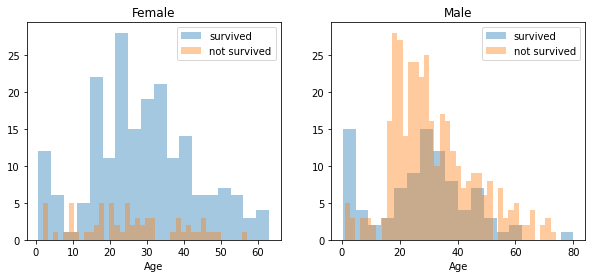

In [0]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

*We see that men have a high probability of survival between the ages of 18 - 30 years old and low between 5 and 18.*

*For women, the survival chances  are higher between 14 and 40.*



***Let's see if there's any correlation between ports embarked and survival***

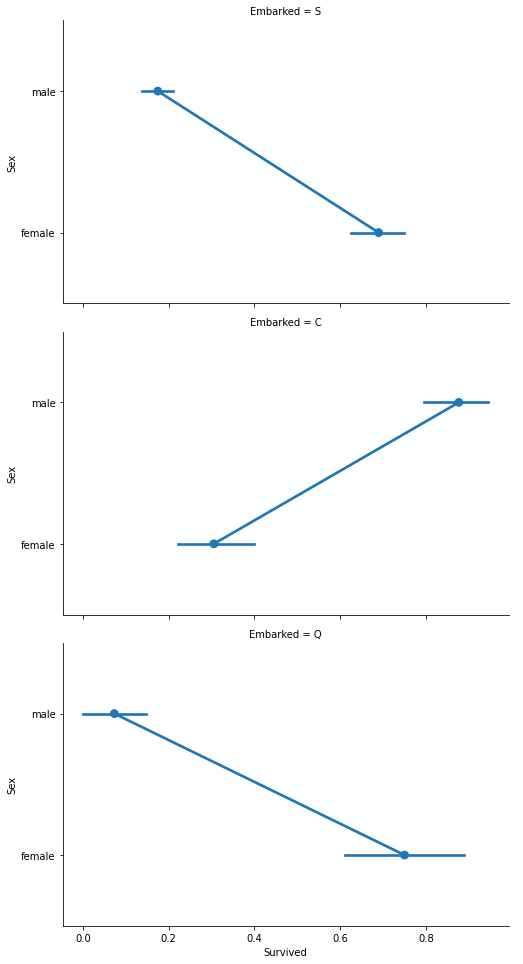

In [0]:
FacetGrid = sns.FacetGrid(train_data, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

*Here, we notice the port they embark from seems to be correlated to survival.*

*Men have a high probability of survival if they were on Port C (Cherbourg), but a low probability if they were on S (Southampton) and Q (Queenstown).*

*Women have a high probability of survival if they were on port Q and S compared to port C.*

***Let's see if `Pclass` shows any correlation with survival***

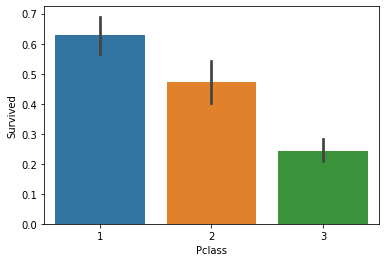

In [0]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

*Here, we see that people in class 1 had higher chances of survival compared to people in classes 2 and 3*

**3. Data Preprocessing**

***Let's drop the `PassengerId`  from the training set since it does not contribute to a person's survival probability.***

In [0]:
train_data = train_data.drop(['PassengerId'], axis=1)

***Let's also drop Cabin since it has a lot of missing values.***

In [0]:
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

**Since `Age `has missing values, let's create an that will fill the empty values with random values based on mean and standard deviation of the column.**

In [0]:
data = [train_data, test_data]

for dataset in data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)
train_data["Age"].isnull().sum()

0

***Since `Embarked` has just 2 missing values, we'll replace the empty values with the mode (most common values).***

In [0]:
embarked_mode = train_data['Embarked'].mode()
data = [train_data, test_data]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(embarked_mode)

***Converting Features:***

***Convert `Embarked` feature into numeric***

In [0]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    dataset['Embarked'] = dataset['Embarked'].fillna(0)
    dataset['Embarked'] = dataset['Embarked'].astype(int)

***Convert `Sex` feature into numeric***

In [0]:
genders = {"male": 0, "female": 1}
data = [train_data, test_data]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

***Convert `fare` feature to numeric***

In [0]:
data = [train_data, test_data]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

***Ticket***

In [0]:
train_data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

***Since the `Ticket` attribute has 681 unique tickets, we will drop it from the dataset.***

In [0]:
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

***We will extract the titles from the `Names` attribute and create a new dataset with it. After which we're going to drop it.***

In [0]:
data = [train_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

***```Fare``` is a float. We have to convert it from float to int64 using ```astype()``` function.***



In [0]:
data = [train_data, test_data]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   Embarked  891 non-null    int64
 8   Title     891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB


In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int64
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Fare         418 non-null    int64
 7   Embarked     418 non-null    int64
 8   Title        418 non-null    int64
dtypes: int64(9)
memory usage: 29.5 KB


***We've successfully converted all `object` and `float` in our test and training sets to `int64`, now we're ready to build our model.***

There are more preprocessing techniques you can try out on your own to boost the accuracy of your model.


**4. Building Machine Learning Models**

This is a classification problem since our required output variable is a category such as orange or yellow, spam or not spam, benign or malignant, in this case, 1 (alive) or 0 (dead).

There are several classification models some of which are:


*   Decision Trees
*   Linear Classifiers such as: Logistic Regression, Naive Bayes
*   Random Forest
*   Nearest Neighbor, etc.









Let's try **Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()

In [0]:
# Instantiate our model
logreg = LogisticRegression(max_iter = 4000)
# Fit our model to the training data
logreg.fit(X_train, Y_train)
# Predict on the test data
logreg_predictions = logreg.predict(X_test)


logreg_data = pd.read_csv(test_data_path)
logreg_data.insert((logreg_data.shape[1]),'Survived',logreg_predictions)

#logreg_data.to_csv('my_model.csv')
print(logreg_data)

#to calculate the accuracy of our model
acc_log = round(logreg.score(X_train, Y_train) * 100,2)



     PassengerId  Pclass  ... Embarked Survived
0            892       3  ...        Q        0
1            893       3  ...        S        1
2            894       2  ...        Q        0
3            895       3  ...        S        0
4            896       3  ...        S        1
..           ...     ...  ...      ...      ...
413         1305       3  ...        S        0
414         1306       1  ...        C        1
415         1307       3  ...        S        0
416         1308       3  ...        S        0
417         1309       3  ...        C        0

[418 rows x 12 columns]


***Let's check the accuracy of our model***

In [0]:
print(f"Accuracy: {acc_log}")


The accuracy of our model is:
80.81


**References:**

For more on this you can check out the Medium posts below or check out the competition on [Kaggle](https://www.kaggle.com/c/titanic).


[This will help you score 95 percentile in the Kaggle Titanic ML competition](https://medium.com/@praveen.orvakanti/this-will-help-you-score-95-percentile-in-the-kaggle-titanic-ml-competition-aa2b3fd1b79b//)

[Predicting the Survival of Titanic Passengers](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8)

